# Deep Learning
## Progressively train deeper and more accurate models

### Assignment 2

Previously in `1_notmnist.ipynb`, we created a pickle with formatted datasets for training, development and testing on the [notMNIST dataset](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html).

The goal of this assignment is to progressively train deeper and more accurate models using TensorFlow.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
#from __future__ import print_function
import numpy as np
#import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

%matplotlib inline
import matplotlib.pyplot as plt

First reload the data we generated in `1_notmnist.ipynb`.

In [2]:
pickle_file = '../data/notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (200000, 28, 28), (200000,))
('Validation set', (10000, 28, 28), (10000,))
('Test set', (10000, 28, 28), (10000,))


Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix,
- labels as float 1-hot encodings.

In [3]:
image_size = 28
k = num_labels = 10

from keras.utils import np_utils 

train_labels_oh = np_utils.to_categorical(train_labels, num_labels) 
valid_labels_oh = np_utils.to_categorical(valid_labels, num_labels)
test_labels_oh  = np_utils.to_categorical(test_labels, num_labels)

train_dataset = train_dataset.reshape((200000,-1))
valid_dataset = valid_dataset.reshape((10000,-1))
test_dataset = test_dataset.reshape((10000,-1))
print('Training set', train_dataset.shape, train_labels_oh.shape)
print('Validation set', valid_dataset.shape, valid_labels_oh.shape)
print('Test set', test_dataset.shape, test_labels_oh.shape)

Using Theano backend.


('Training set', (200000, 784), (200000, 10))
('Validation set', (10000, 784), (10000, 10))
('Test set', (10000, 784), (10000, 10))


# Logistic Regression e gradiente descendente
## Build the model: 

In [4]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD
output_dim = nb_classes = 10 
input_dim = image_size * image_size
model = Sequential() 
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
batch_size = 10000
nb_epoch = 800

# Compile the model

('Final loss:', 0.501445472240448)


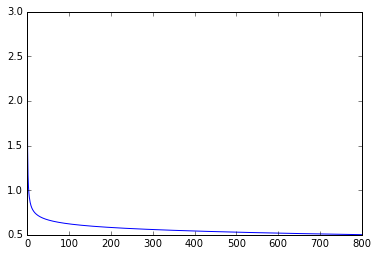

In [5]:
size = 10000
sgd = SGD(lr= 0.5, decay=0e-6, momentum=0., nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy') 
history = model.fit(train_dataset[:size], train_labels_oh[:size], batch_size=batch_size, 
                    nb_epoch=nb_epoch,\
                    verbose=0) 
print('Final loss:', history.history['loss'][-1])
plt.plot(history.history['loss'])

In [6]:
def getAccuracy(X,Y):
    Y_hat = model.predict_classes(X)
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

train_ac = getAccuracy(train_dataset[:size],train_labels[:size])
test_ac  = getAccuracy(test_dataset[:size],test_labels[:size])
print 
print 'Training Accuracy: ', train_ac
print 'Test Accuracy: ', test_ac

 9984/10000 [============================>.] - ETA: 0s
Training Accuracy:  0.8716
Test Accuracy:  0.8831


# Stochastic gradient descent

Vamos repetir o experiment anterior, porém agora com gradiente estocástico.
Agora em vez de utilizar todos os dados para cada iteração da otimização, iremos utilizar
apenas uma fração: 128


('Final loss:', 0.1488785058438778)


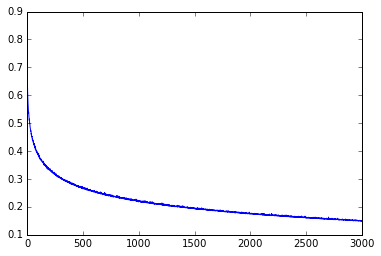

In [7]:
batch_size = 128

output_dim = nb_classes = 10 
input_dim = image_size * image_size
model = Sequential() 
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
batch_size = 128
nb_epoch = 3000
size = 10000
sgd = SGD(lr= 0.5, decay=0e-6, momentum=0., nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy') 
history = model.fit(train_dataset[:size], train_labels_oh[:size], batch_size=batch_size, 
                    nb_epoch=nb_epoch,\
                    verbose=0) 
print('Final loss:', history.history['loss'][-1])
plt.plot(history.history['loss'])


In [8]:
train_ac = getAccuracy(train_dataset[:size],train_labels[:size])
test_ac  = getAccuracy(test_dataset[:size],test_labels[:size])
print 
print 'Training Accuracy: ', train_ac
print 'Test Accuracy: ', test_ac

 9152/10000 [==========================>...] - ETA: 0s
Training Accuracy:  0.9769
Test Accuracy:  0.8053


# 1-hidden Layer with reLU

This is an 1-hidden layer neural network with rectified linear units (nn.relu()) and 1024 hidden nodes. This model should improve your validation / test accuracy.


Let's run it:

('Final loss:', 0.18646489983320236)


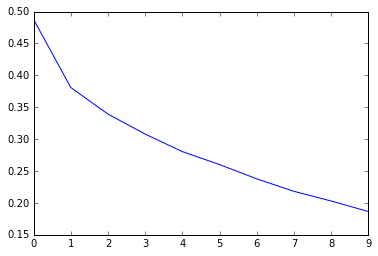

In [9]:
num_hidden_nodes = 1024
input_dim = image_size * image_size
output_dim = nb_classes = 10

from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2

model = Sequential() 
model.add(Dense(num_hidden_nodes, input_dim=input_dim, activation='relu'))
model.add(Dense(output_dim, activation='softmax')) 
batch_size = 128
nb_epoch = 10 #3000

sgd = SGD(lr= 0.5, decay=0e-6, momentum=0., nesterov=False)
model.compile(optimizer=sgd , loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(train_dataset[:size], train_labels_oh[:size], batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=0,)
print('Final loss:', history.history['loss'][-1])
plt.plot(history.history['loss'])


In [11]:
train_ac = getAccuracy(train_dataset[:size],train_labels[:size])
test_ac  = getAccuracy(test_dataset,test_labels)
print 
print 'Training Accuracy: ', train_ac
print 'Test Accuracy: ', test_ac

 9920/10000 [============================>.] - ETA: 0s
Training Accuracy:  0.9592
Test Accuracy:  0.9553
